## Anushka Mangesh Dawande PGA Batch 38

# E-commerce Customer Churn Analysis & Prediction.

# Objective :

* The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

# Step 1 : Import Library and Dataset

In [ ]:
############### Data Analysis & calculation #####################
import pandas as pd
import numpy as np

############## Machine Learning
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel (r"C:\Users\LENOVO\Desktop\ML\ML project\E Commerce Dataset.xlsx")
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])

Rows     :  5630
Columns  :  20


### Interpretation:
* In our data we have 5630 Rows and 20 Columns.

In [ ]:
data_dict = pd.read_excel(r"C:\Users\LENOVO\Desktop\ML\E Commerce Dataset.xlsx")
data_dict.columns = data_dict.iloc[0]
data_dict = data_dict[1:].reset_index()
data_dict[['Variable','Discerption']]

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


# Step 2: Data Pre-Processing (Exploratory Data Analysis tasks)

1. Data Type and conversion
2. Identifying & Treatment Missing values
3. Label Encoding wherever required
4. Identifying & Treatment Outilers

## Data Type and conversion

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## Removing Irrelavent Variable

In [ ]:
data = data.drop(['CustomerID'],axis=1)
data.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## Identifying & Treatment Missing Value

In [ ]:
# Do we have NA's in data
data.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Interpretation:
* Here we see that Tenure,WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder these variables are having missing values.

In [ ]:
for column in ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']:
    data[column].fillna(data[column].mean(), inplace=True)

In [ ]:
data.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
#Tenure to categorical column
def tenure_lab(data) :
    if data["Tenure"] <= 6 :
        return "Tenure_0_6"
    elif (data["Tenure"] > 6) & (data["Tenure"] <= 12 ):
        return "Tenure_7_12"
    elif (data["Tenure"] > 12) & (data["Tenure"] <= 24) :
        return "Tenure_13_24"
    elif (data["Tenure"] > 24) & (data["Tenure"] <= 36) :
        return "Tenure_25-36"
    elif data["Tenure"] > 36 :
        return "Tenure_gt_36"
# banK = x
data["Tenure_group"] = data.apply(lambda x :tenure_lab(x),axis = 1)

In [ ]:
data.Tenure_group.value_counts(dropna=False)

Tenure_0_6      2150
Tenure_7_12     1584
Tenure_13_24    1467
Tenure_25-36     425
Tenure_gt_36       4
Name: Tenure_group, dtype: int64

In [ ]:
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,Tenure_0_6
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,Tenure_7_12
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,Tenure_7_12
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,Tenure_0_6
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,Tenure_0_6


In [ ]:
((1467+425+4)/5630)*100

33.676731793960926

In [ ]:
((2510+1584)/5630)*100

72.71758436944937

### Interpretation:
* 72% of customer tenure for more than a Year

# Data Visualization

## Churn Rate Analysis

##### Bad Rate Analysis == 0 : Good & 1 : Bad  

In [ ]:
data.Churn.value_counts(ascending=False)

0    4682
1     948
Name: Churn, dtype: int64

In [5]:
import plotly.express as px

fig = px.pie(data,names='Churn')
fig.show()

NameError: name 'data' is not defined

### Interpretation:
* There are 16% bad customer in dataset who are going to churn

In [ ]:
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,Tenure_0_6
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,Tenure_7_12
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,Tenure_7_12
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,Tenure_0_6
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,Tenure_0_6


In [6]:
fig = px.sunburst(data, path=['Gender',"PreferredLoginDevice",'PreferredPaymentMode','PreferedOrderCat',
                                    'MaritalStatus','Tenure_group'])
fig.show()

NameError: name 'data' is not defined

### Conclusion :- Customer Trend Analysis .
* Customer who leave the service :
* Gender = Female
* PreferredLoginDevice = Mobile phone
* PreferredPaymentMode = Debit Card Users
* PreferedOrderCat = Laptop & Accessory
* MaritalStatus = Married
* Tenure_group = Tenure_7_12.

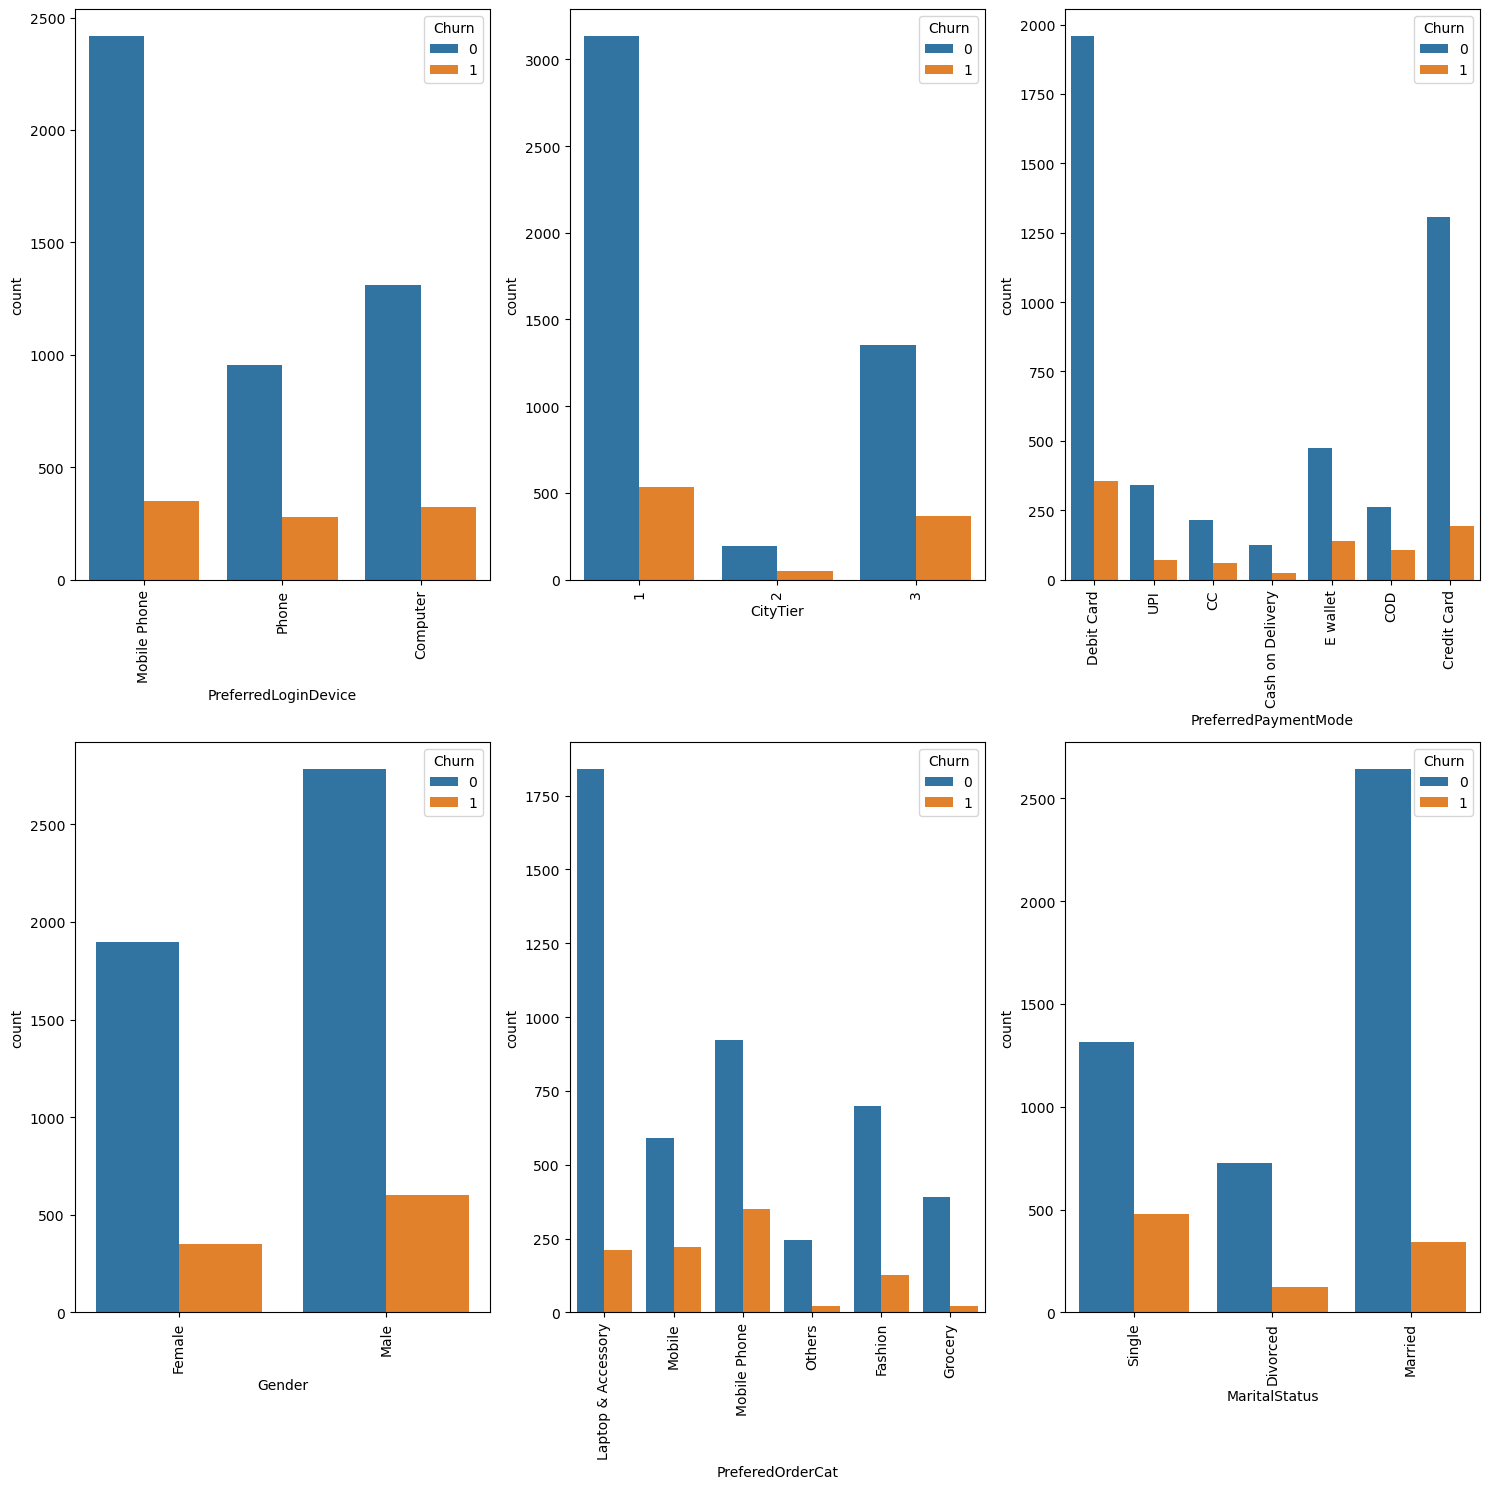

In [ ]:
# List of categorical variables to plot
cat_vars = ['PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data = data, ax=axs[i])
    # for ratation of the lables
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

### Interpretation:
* Here we see there are high range of Mobile Phone user who are going to Churn.
* From City Tier - 1 are more people who can Churn.
* Customer whoes Payment mode is Dedit card will churn.
* In gender herr we see that male are going to Churn.
* Customer who are buying the Mobile phone, high chances to getting Churn.
* Customer who are single can Churn.

In [ ]:
data.head(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,Tenure_0_6
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,Tenure_7_12
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,Tenure_7_12
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,Tenure_0_6
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,Tenure_0_6


### Scatterplot

<AxesSubplot:xlabel='CashbackAmount', ylabel='Churn'>

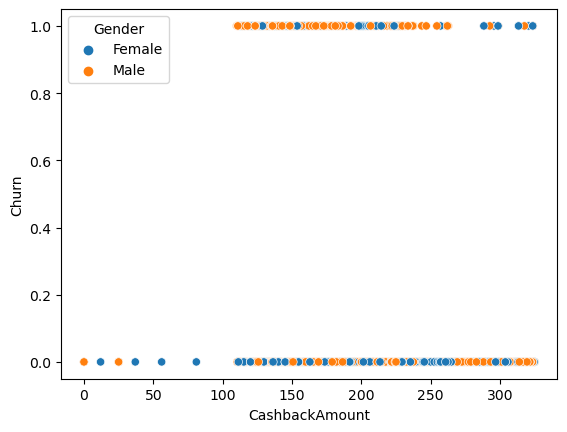

In [ ]:
sns.scatterplot(x='CashbackAmount',y='Churn',hue="Gender",data=data)

### Interpretation:
* Male has more Cash Back Amount than female

###  Bar chart

<AxesSubplot:xlabel='Complain', ylabel='Gender'>

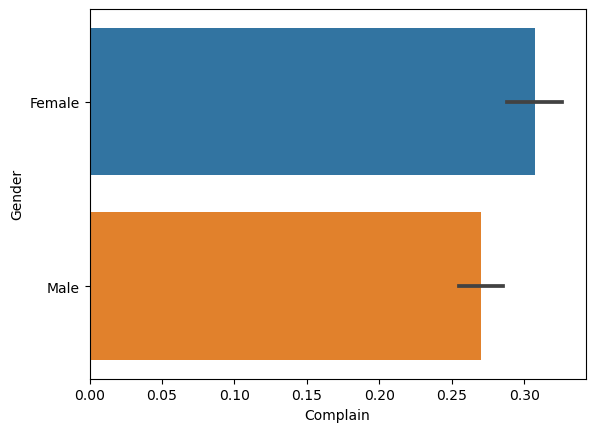

In [ ]:
sns.barplot(x='Complain',y='Gender',data=data)

### Interpretation:
* Wee see that there are more complains from gender female.

## Stacked Bar Chart

In [ ]:
grp = data.groupby("CityTier",as_index=False).agg({'HourSpendOnApp': 'count',
                                            'NumberOfDeviceRegistered': 'count',
                                            'NumberOfAddress': 'count'}
                                        ).sort_values(by='HourSpendOnApp',ascending=False)
grp

,CityTier,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress
0,1,3666,3666,3666
2,3,1722,1722,1722
1,2,242,242,242


In [ ]:
import plotly.express as px  # plot

fig = px.bar(grp, x="CityTier", y=["HourSpendOnApp", "NumberOfDeviceRegistered", "NumberOfAddress"],title="User_Report")
fig.show()

## Histogram

<AxesSubplot:xlabel='Tenure_group', ylabel='Count'>

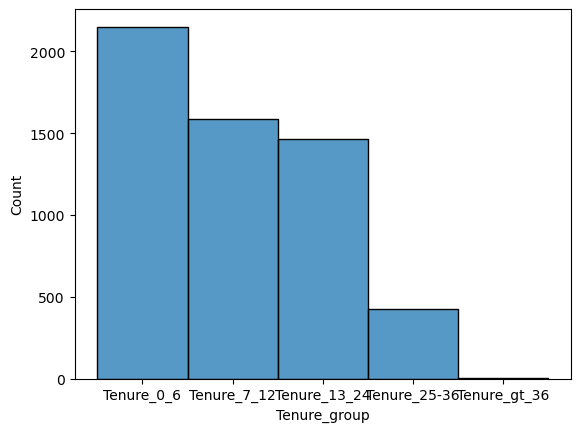

In [ ]:
sns.histplot(x='Tenure_group',data=data,binwidth=14)

### Interpretation:
* The more Customers we have from tenure group 0-6.
* Means the number of years the customers are customers.

<AxesSubplot:xlabel='HourSpendOnApp', ylabel='MaritalStatus'>

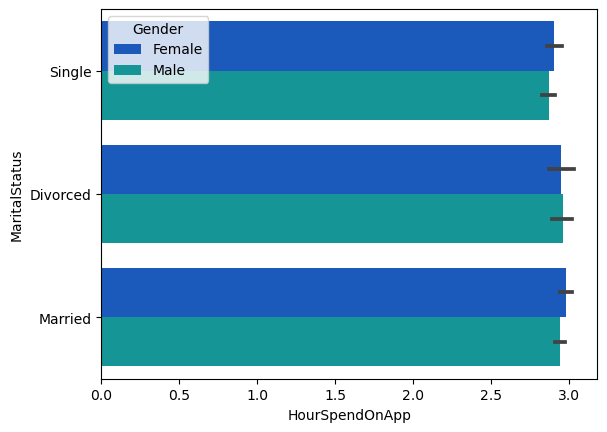

In [ ]:
sns.barplot(x='HourSpendOnApp',y='MaritalStatus',hue='Gender',data=data,
            palette='winter')
# palette is used for colour the based on hue variable

## Pie chart

In [ ]:
import plotly.express as px

fig = px.pie(data,names='SatisfactionScore')

fig.show()

### Interpretation:
* Here we see that 19% customers gives the high SatisfactionScore which are Satisfied with the service.

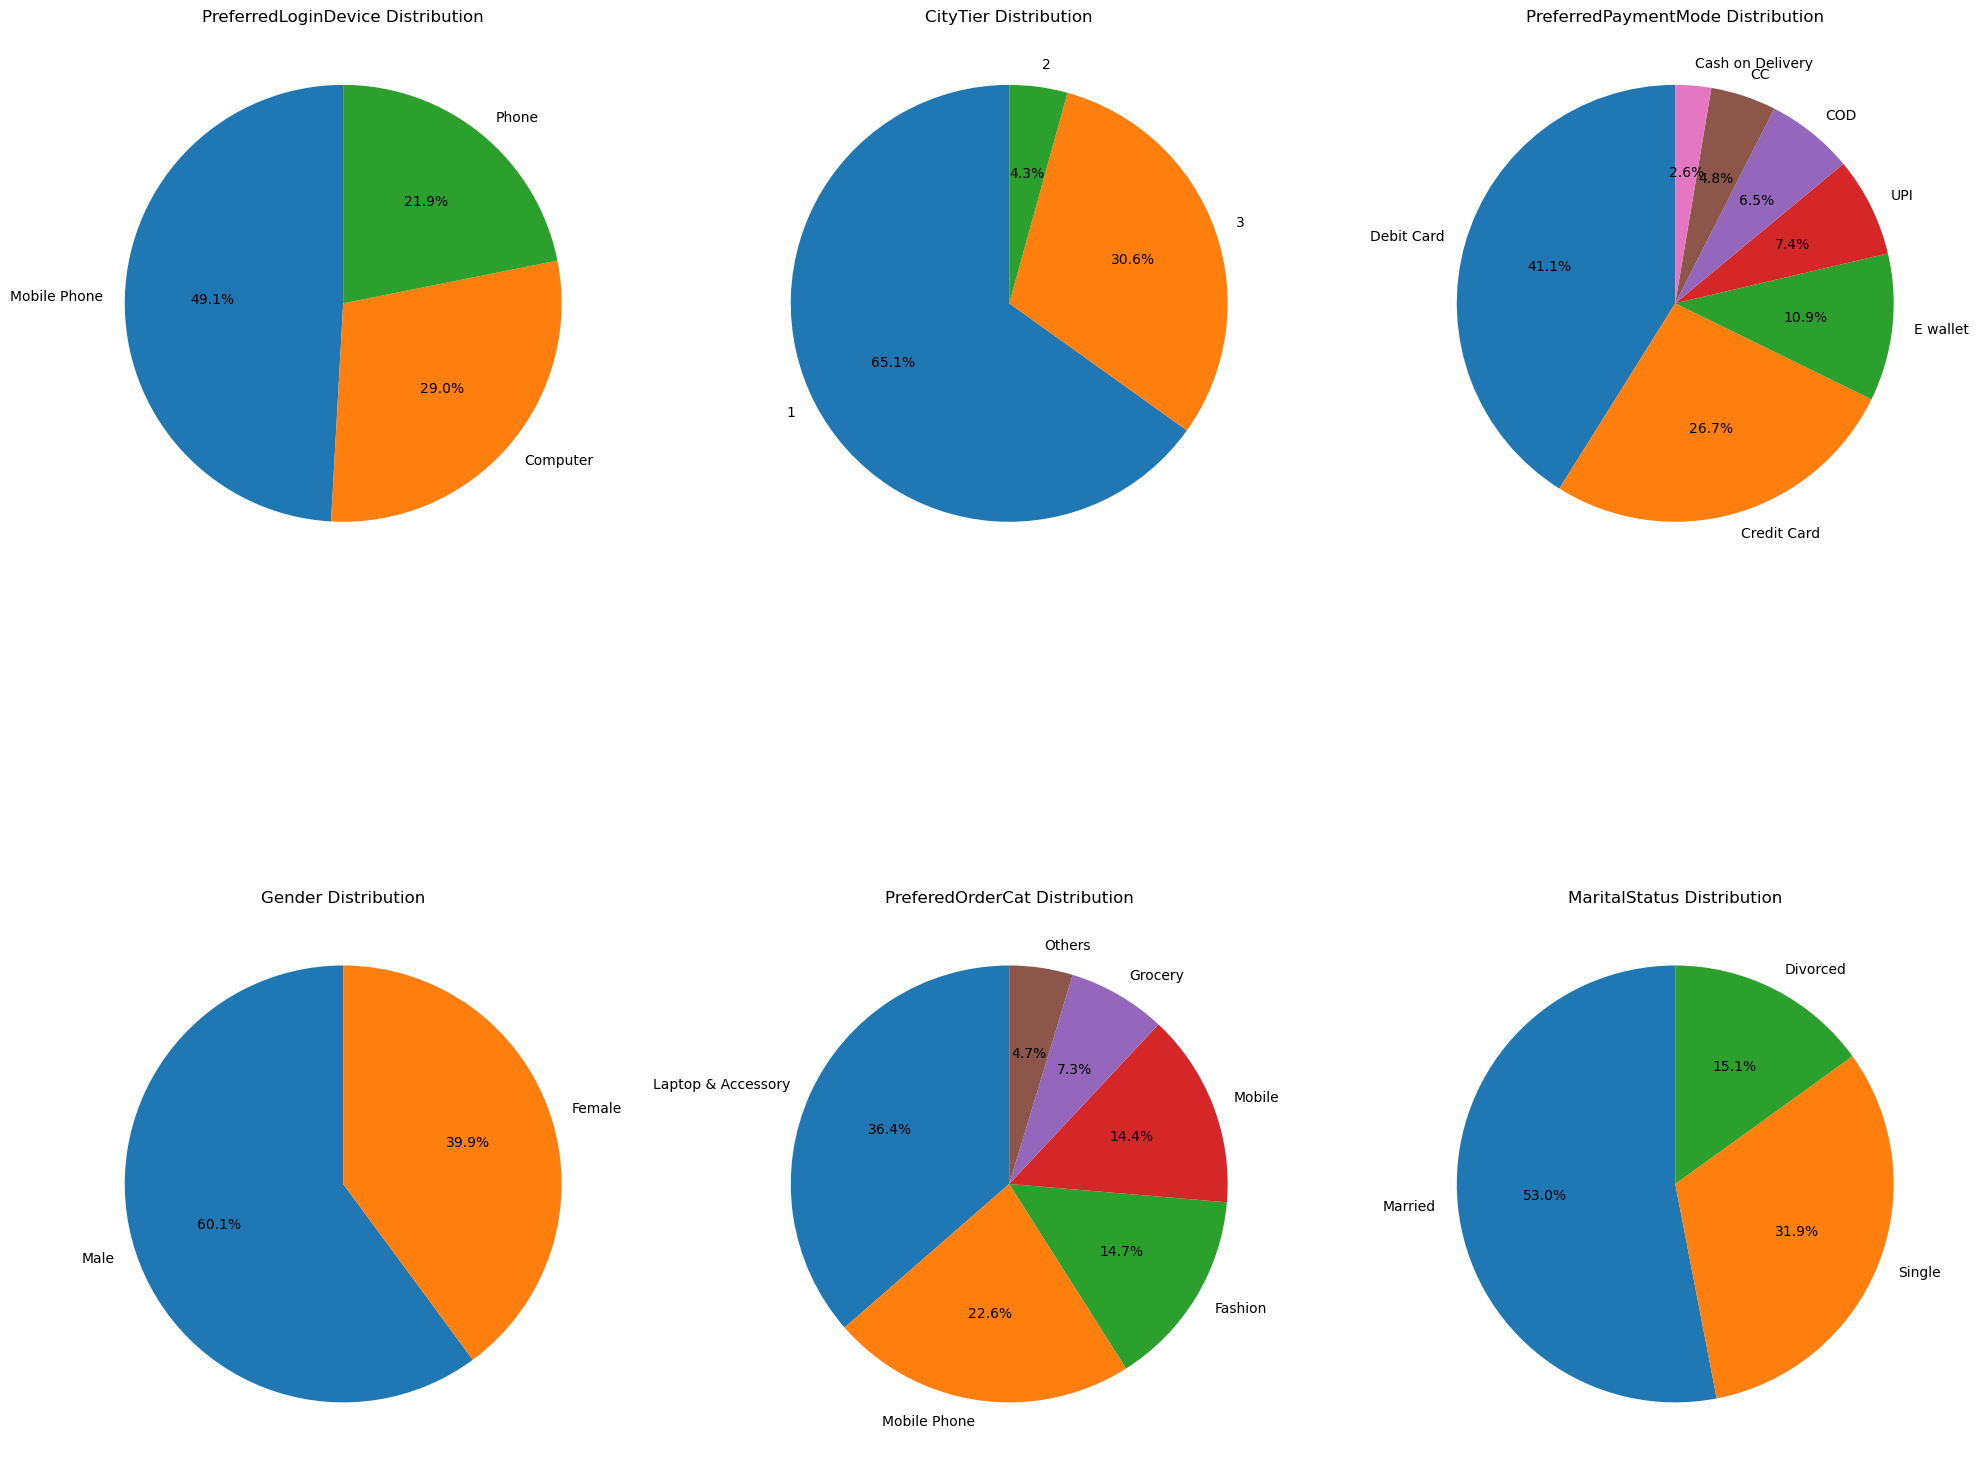

In [ ]:
Cat_vars = ['CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,20))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = data[var].value_counts()

        # cretae a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


## Deal with correlated variables

Text(0.5, 1.0, 'Correlation Matrix')

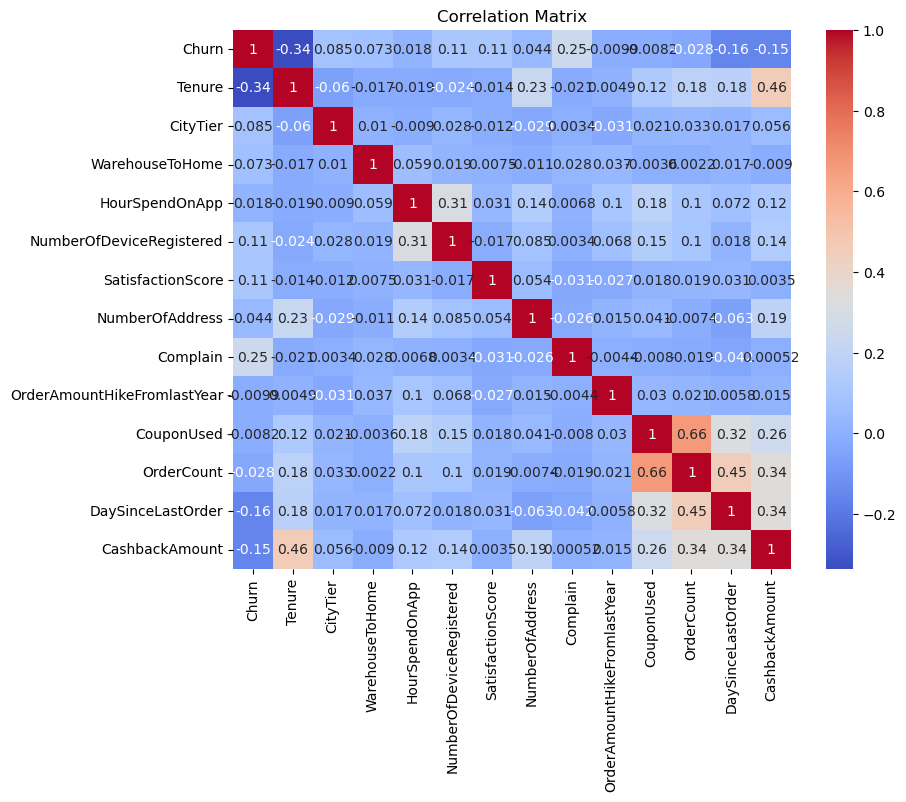

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),cmap='coolwarm',annot = True)

plt.title('Correlation Matrix')

##### Interpretation:
* By doing heatmap for Correlation,we see there is No collinearity in the data, indicate no multi colinearity

# Breaking Data into Two Part :
* Quantitative Variable (numeric columns)
* Qualitative Variable (categorical columns)

## Taking subset data of Number:

In [ ]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
# #Employee Numeric columns
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,10.189899,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,1,10.189899,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28


## Taking subset data of Category

In [ ]:
data_dummies = data[data.select_dtypes(include=['object']).columns.tolist()]
data_dummies.head(3)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Tenure_group
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,Tenure_0_6
1,Phone,UPI,Male,Mobile,Single,Tenure_7_12
2,Phone,Debit Card,Male,Mobile,Single,Tenure_7_12


## Converting Quality Variable to Number

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_dummies=data_dummies.apply(LabelEncoder().fit_transform)
data_dummies.head(3)
# label in ascending order

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Tenure_group
0,1,4,0,2,2,0
1,2,6,1,3,2,3
2,2,4,1,3,2,3


## Combine to Dataset

In [ ]:
data_combined = pd.concat([data_num, data_dummies],axis=1)

In [ ]:
data_combined.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Tenure_group
0,1,4.000000,3,6.0,3.000000,3,2,9,1,11.0,1.0,1.0,5.0,159.93,1,4,0,2,2,0
1,1,10.189899,1,8.0,3.000000,4,3,7,1,15.0,0.0,1.0,0.0,120.90,2,6,1,3,2,3
2,1,10.189899,1,30.0,2.000000,4,3,6,1,14.0,0.0,1.0,3.0,120.28,2,4,1,3,2,3
3,1,0.000000,3,15.0,2.000000,4,5,8,0,23.0,0.0,1.0,3.0,134.07,2,4,1,2,2,0
4,1,0.000000,1,12.0,2.931535,3,5,3,0,11.0,1.0,1.0,3.0,129.60,2,0,1,3,2,0


### Step 3: Data Partition

In [ ]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = data_combined.drop(['Churn'],axis=1)
y = data_combined[['Churn']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

In [ ]:
print('The number of samples into the Train data is {}.'.format(X_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(X_test.shape[0]))

The number of samples into the Train data is 3941.
The number of samples into the Test data is 1689.


##### Interpretation:
* By data partition here data split is into two parts train and test for predication.

## Normalization of Data by Standardization Techniques

In [ ]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the following Supervised Learning models:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN
5. Naive Bayes
6. Xg Boost
7. SVM

## a.Logistic Regression

## Step 1 :Model building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [ ]:
output.intercept_  # beto

array([-2.6975718])

In [ ]:
output.coef_  # Beta 1 --

array([[-1.61336533,  0.32316478,  0.28941349, -0.16163029,  0.28161872,
         0.50856151,  0.44203569,  0.75495302, -0.10401989,  0.15784615,
         0.38806315, -0.46969772, -0.1927659 , -0.15469888, -0.04168849,
         0.17146068,  0.26130525,  0.39529025,  0.01124548]])

In [ ]:
data.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Tenure_group'],
      dtype='object')

In [ ]:
X_train=pd.DataFrame(X_train,columns=['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Tenure_group'])
X_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484


In [ ]:
y_train.reset_index(drop=True, inplace=True)

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0


## Step 2: Predictions on Train Dataset

In [ ]:
train['Probability']= output.predict_proba(X_train)[:,1]  # MODEL = dt
train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Probability
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,...,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0,0.140651
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,...,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0,0.023476
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,...,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0,0.193712
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0,0.033307
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,...,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0,0.005926


In [ ]:
train['Predicted']=output.predict(X_train)
train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Probability,Predicted
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,...,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0,0.140651,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,...,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0,0.023476,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,...,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0,0.193712,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0,0.033307,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0,0.005926,0


### Step 3: Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Churn'])
print(matrix)

[[3173  362]
 [ 107  299]]


### Final accuracy of Model

In [ ]:
Accuracy_Train=((3173+299)/(3941)*100)
print(Accuracy_Train)

88.09946714031972


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3280
           1       0.74      0.45      0.56       661

    accuracy                           0.88      3941
   macro avg       0.82      0.71      0.75      3941
weighted avg       0.87      0.88      0.87      3941



##### Interpretation:
* Here we get 88% of accuracy on train.
* Here we have 45% bad Customer in our dataset which are going to churn.
* Here we have 97% good customer in our dataset which will not churn.
* Model Performance on Train dataset is good fit

## Step 4: Predictions on Test Dataset

In [ ]:
X_test=pd.DataFrame(X_test,columns=['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Tenure_group'])
X_test.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,-0.362340,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,-0.362340,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,-0.010694,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,-0.711194,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,-0.711194,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246


In [ ]:
y_test.reset_index(drop=True,inplace=True)

In [ ]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,-0.362340,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,-0.362340,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,-0.010694,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,-0.711194,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,-0.711194,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0


In [ ]:
test['Predicted']=output.predict(X_test)
test.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,...,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0,0


### Step 5: Model Performance Metrics on Test data

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Churn'])
print(confusion_matrix)

[[1342  158]
 [  60  129]]


In [ ]:
Accuracy_test=((1342 +129)/(1689)*100)
Accuracy_test

87.09295441089402

##### Interpretation: Here we get 87% accuracy on test.

### Sensitivity & Specificity

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1402
           1       0.68      0.45      0.54       287

    accuracy                           0.87      1689
   macro avg       0.79      0.70      0.73      1689
weighted avg       0.86      0.87      0.86      1689



* Here we get 87% accuracy on test.
* Here we have 45% bad Customer in our dataset which are going to churn.
* Here we have 96% good customer in our dataset which will not churn.
* Model Performance on Test dataset is good fit

## Step 6 :- ROCR Plot

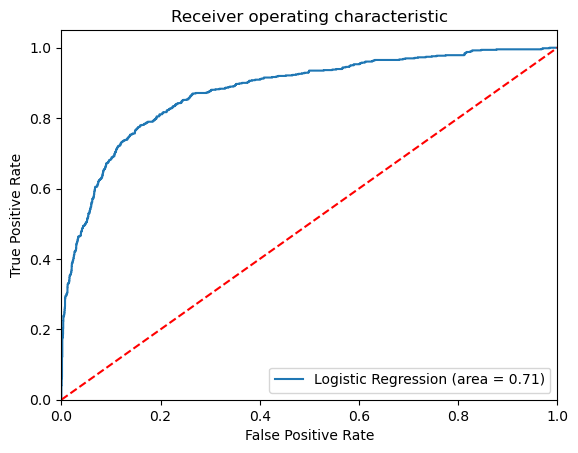

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train)
                                 [:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

##### Interpretation:
* It indicates goodness of fit as itsvalue approaches one, and a poor fit to the data as its value approaches zero

### Live Data

In [ ]:
live_data = data.loc[[489,543,765,234,321],['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Tenure_group']]
live_data

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
489,0.0,Computer,1,15.639896,CC,Female,2.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,7.0,123.66,Tenure_0_6
543,1.0,Phone,1,15.639896,CC,Female,3.0,3,Mobile,3,Married,6,0,18.0,2.0,2.0,2.0,123.77,Tenure_0_6
765,27.0,Computer,1,6.000000,Debit Card,Female,2.0,3,Fashion,3,Married,8,0,17.0,1.0,1.0,4.0,205.02,Tenure_25-36
234,9.0,Computer,3,9.000000,Credit Card,Male,2.0,4,Fashion,2,Divorced,5,0,11.0,0.0,1.0,12.0,196.99,Tenure_7_12
321,14.0,Computer,3,16.000000,Debit Card,Male,2.0,3,Laptop & Accessory,2,Single,8,0,14.0,0.0,1.0,10.0,162.30,Tenure_13_24


In [ ]:
num = live_data[live_data.select_dtypes(include=[np.number]).columns.tolist()]
cat = live_data[live_data.select_dtypes(include=['object']).columns.tolist()]

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat=cat.apply(LabelEncoder().fit_transform)
cat.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Tenure_group
489,0,0,0,2,0,0
543,1,0,0,2,1,0
765,0,2,0,0,1,2
234,0,1,1,0,0,3
321,0,2,1,1,2,1


In [ ]:
final_live_data = pd.concat([num, cat],axis=1)
final_live_data.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Tenure_group
489,0.0,1,15.639896,2.0,4,3,2,1,14.0,0.0,1.0,7.0,123.66,0,0,0,2,0,0
543,1.0,1,15.639896,3.0,3,3,6,0,18.0,2.0,2.0,2.0,123.77,1,0,0,2,1,0
765,27.0,1,6.000000,2.0,3,3,8,0,17.0,1.0,1.0,4.0,205.02,0,2,0,0,1,2
234,9.0,3,9.000000,2.0,4,2,5,0,11.0,0.0,1.0,12.0,196.99,0,1,1,0,0,3
321,14.0,3,16.000000,2.0,3,2,8,0,14.0,0.0,1.0,10.0,162.30,0,2,1,1,2,1


In [ ]:
final_live_data['Predicted']=output.predict(final_live_data)
final_live_data.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Tenure_group,Predicted
489,0.0,1,15.639896,2.0,4,3,2,1,14.0,0.0,1.0,7.0,123.66,0,0,0,2,0,0,0
543,1.0,1,15.639896,3.0,3,3,6,0,18.0,2.0,2.0,2.0,123.77,1,0,0,2,1,0,0
765,27.0,1,6.000000,2.0,3,3,8,0,17.0,1.0,1.0,4.0,205.02,0,2,0,0,1,2,0
234,9.0,3,9.000000,2.0,4,2,5,0,11.0,0.0,1.0,12.0,196.99,0,1,1,0,0,3,0
321,14.0,3,16.000000,2.0,3,2,8,0,14.0,0.0,1.0,10.0,162.30,0,2,1,1,2,1,0


In [ ]:
data.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Tenure_group'],
      dtype='object')

## b.Decision Tree

## Step 1: Model Building

In [ ]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

## Step 2: Plotting the Tree

In [ ]:
train_1=pd.concat([y_train,X_train],axis=1)
train_1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349
1,0,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246
2,0,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246
3,0,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246
4,0,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484


In [ ]:
independent_variable = list(train_1.columns[1:])
independent_variable

['Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Tenure_group']

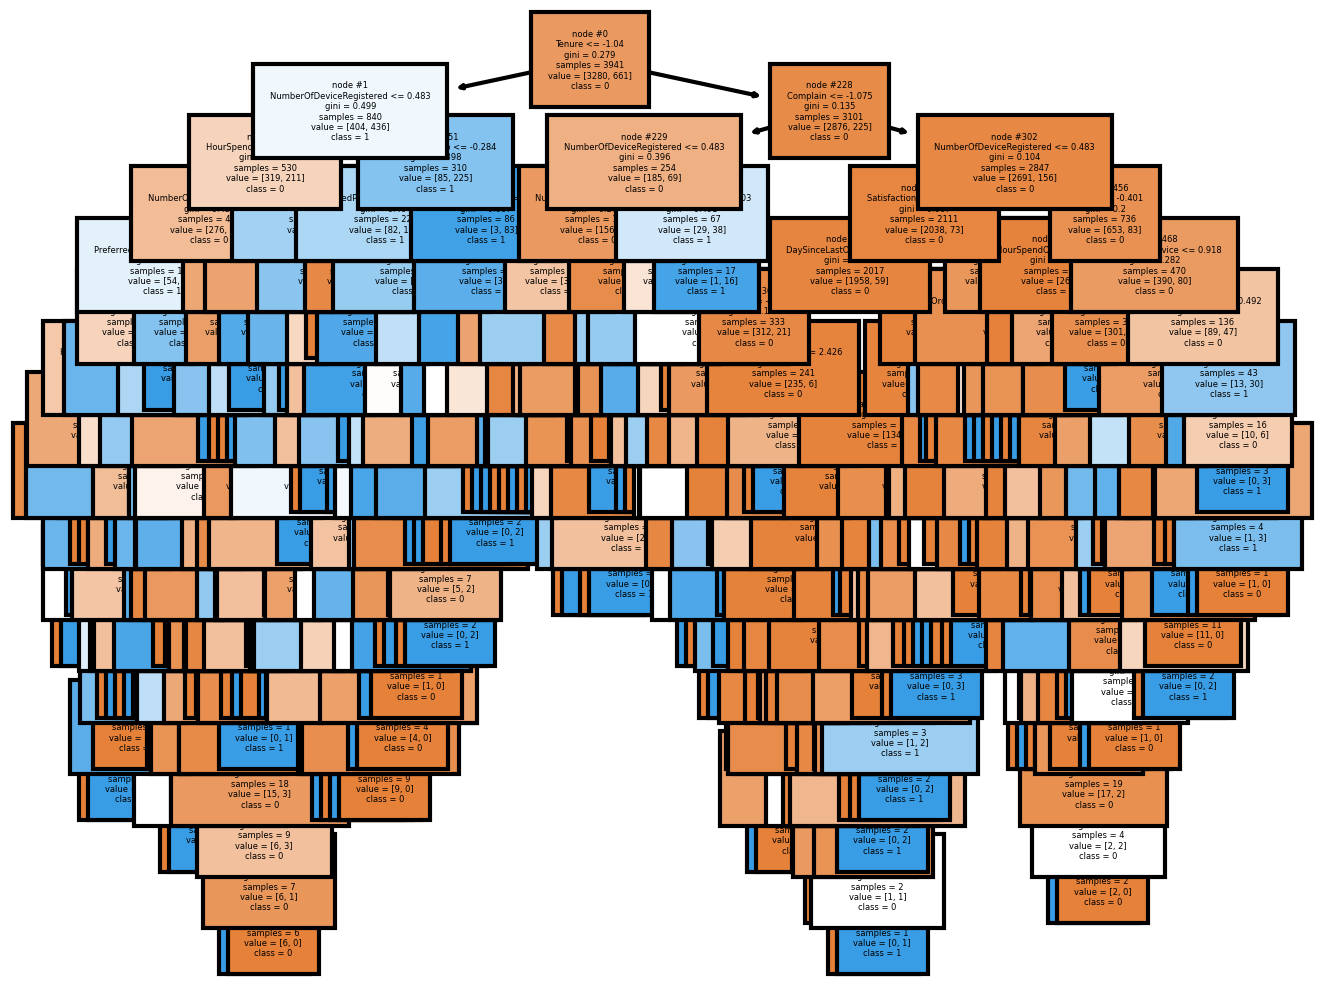

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model
               feature_names = independent_variable,  # column name
               class_names=churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); #
#fig.savefig('imagename.png')

## Step 3 : Predictions on Train Dataset

In [ ]:
train_1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349
1,0,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246
2,0,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246
3,0,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246
4,0,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484


In [ ]:
train_1['Predicted']=dt.predict(X_train)  # MODEL = dt
train_1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Predicted
0,0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,...,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0
1,0,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,...,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0
2,0,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,...,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0
3,0,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,...,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0
4,0,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,...,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0


## Step 4 : Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train_1['Predicted'],train_1['Churn'])
print(matrix)

[[3280    0]
 [   0  661]]


# Final accuracy of Model Before Pruning

In [ ]:
Accuracy_Train_1=((3280+661)/(3941)*100)
print(Accuracy_Train_1)   # overfit or High accuracy

100.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_1['Churn'], train_1['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00       661

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



##### Interpretation:
* Here we get 100% accuracy on train before Pruning.

# Model Improvement by Pruning Method ( Cut Tree)

In [ ]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=40, ## child
                                 min_samples_split=250, #parent
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=250)

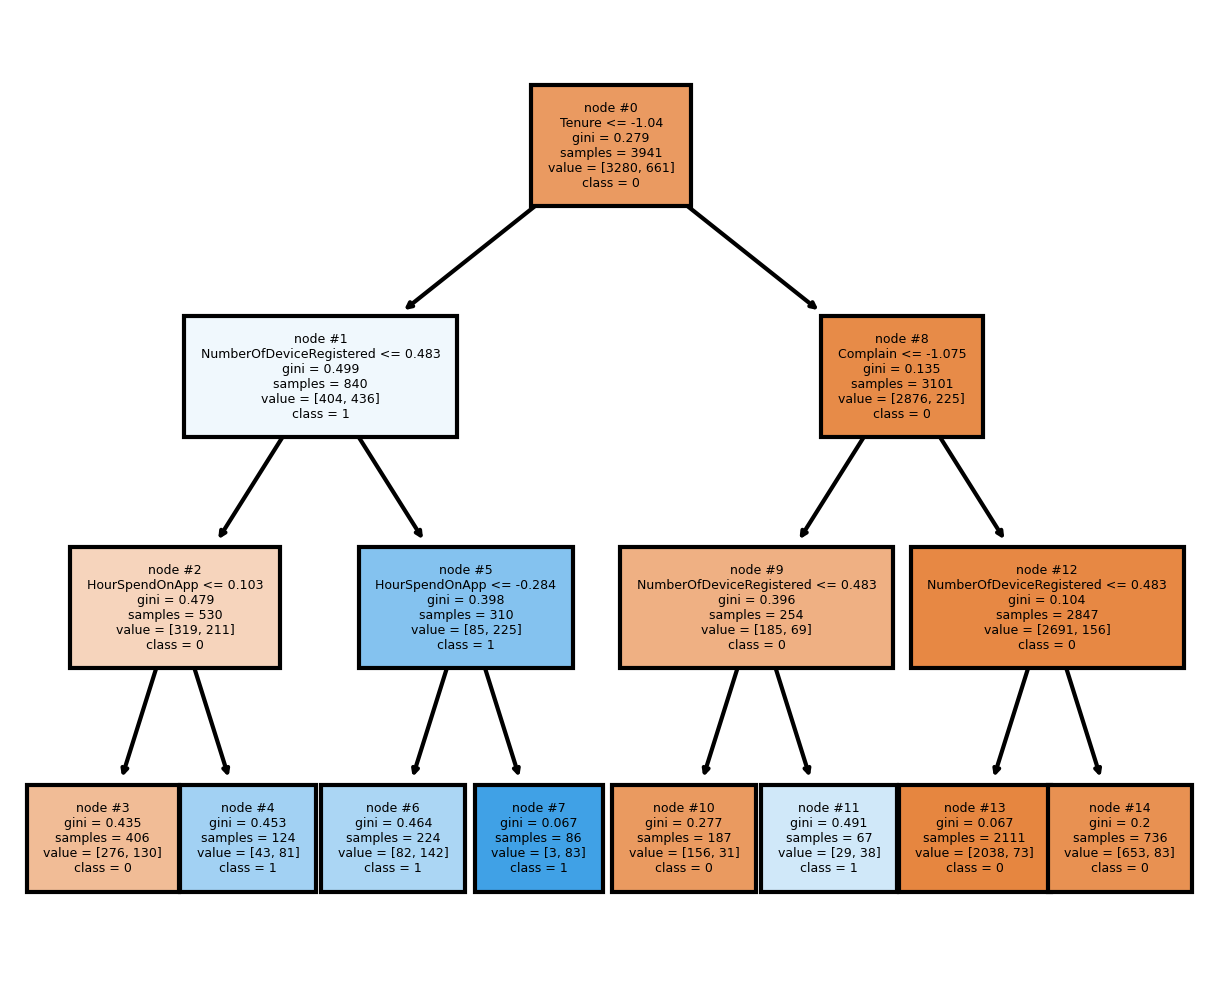

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model
               feature_names = independent_variable,  # column name
               class_names=churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); #
#fig.savefig('imagename.png')

##### Strategy & Prediction
* Tenure = Complain <=-1075 &  NumberOfDeviceRegistered <= 0.483

In [ ]:
train_1['Predicted']=dt.predict(X_train)  # MODEL = dt
train_1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Predicted
0,0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,...,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0
1,0,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,...,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0
2,0,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,...,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0
3,0,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,...,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0
4,0,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,...,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0


# Final accuracy of Model after Pruning

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train_1['Predicted'],train_1['Churn'])
print(matrix)

[[3123  317]
 [ 157  344]]


In [ ]:
Accuracy_Train_1=((3123  + 344)/(3941)*100)
print(Accuracy_Train_1)

87.9725957878711


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_1['Churn'], train_1['Predicted']))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3280
           1       0.69      0.52      0.59       661

    accuracy                           0.88      3941
   macro avg       0.80      0.74      0.76      3941
weighted avg       0.87      0.88      0.87      3941



##### Interpretation:  
* Here we get 88% accuracy on train after Pruning.


## Step 5 : Predictions on Test Dataset

In [ ]:
test_1=pd.concat([X_test,y_test],axis=1)
test.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,...,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0,0


In [ ]:
test_1['Predicted']=dt.predict(X_test)
test_1.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,...,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0,0


## Step 6 : Model Performance Metrics on Test data

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_1['Predicted'],test_1['Churn'])
print(confusion_matrix)

[[1340  134]
 [  62  153]]


In [ ]:
Accuracy_test_1=((1340+153)/(1689)*100)
Accuracy_test_1

88.39550029603316

##### Interpretation:
* Here we get 88% accuracy on test.

# Sensitivity & Specificity

### Train

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_1['Churn'], train_1['Predicted']))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3280
           1       0.69      0.52      0.59       661

    accuracy                           0.88      3941
   macro avg       0.80      0.74      0.76      3941
weighted avg       0.87      0.88      0.87      3941



#### Interpretation:
* Here we get 88% accuracy on train.
* Here we have 52% bad Customer in our dataset which are going to churn.
* Here we have 95% good customer in our dataset which will not churn.
* Model Performance on Train dataset is good fit

### Test

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_1['Churn'], test_1['Predicted']))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1402
           1       0.71      0.53      0.61       287

    accuracy                           0.88      1689
   macro avg       0.81      0.74      0.77      1689
weighted avg       0.88      0.88      0.88      1689



#### Interpretation:
* Here we get 88% accuracy on test.
* Here we have 53% bad Customer in our dataset which are going to churn.
* Here we have 96% good customer in our dataset which will not churn.
* Model Performance on Test dataset is good fit

## Grid Search Method:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [300,150,250], ## Parent
           'min_samples_leaf': [50,60,70], ## Child or Leave
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              verbose=1,
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 60, 70],
                         'min_samples_split': [300, 150, 250]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=300,
                       random_state=42)

## c. Random Forest

## Step 1: Model Building

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form
Model = RandomForestClassifier(n_estimators=10, # make 10 tress
                               criterion="gini",
                               max_depth=3,  # each tree will have 4 branches
                               min_samples_split=50,# each tree will have parent node
                               min_samples_leaf=25,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=25,
                       min_samples_split=50, n_estimators=10)

## Importance Features

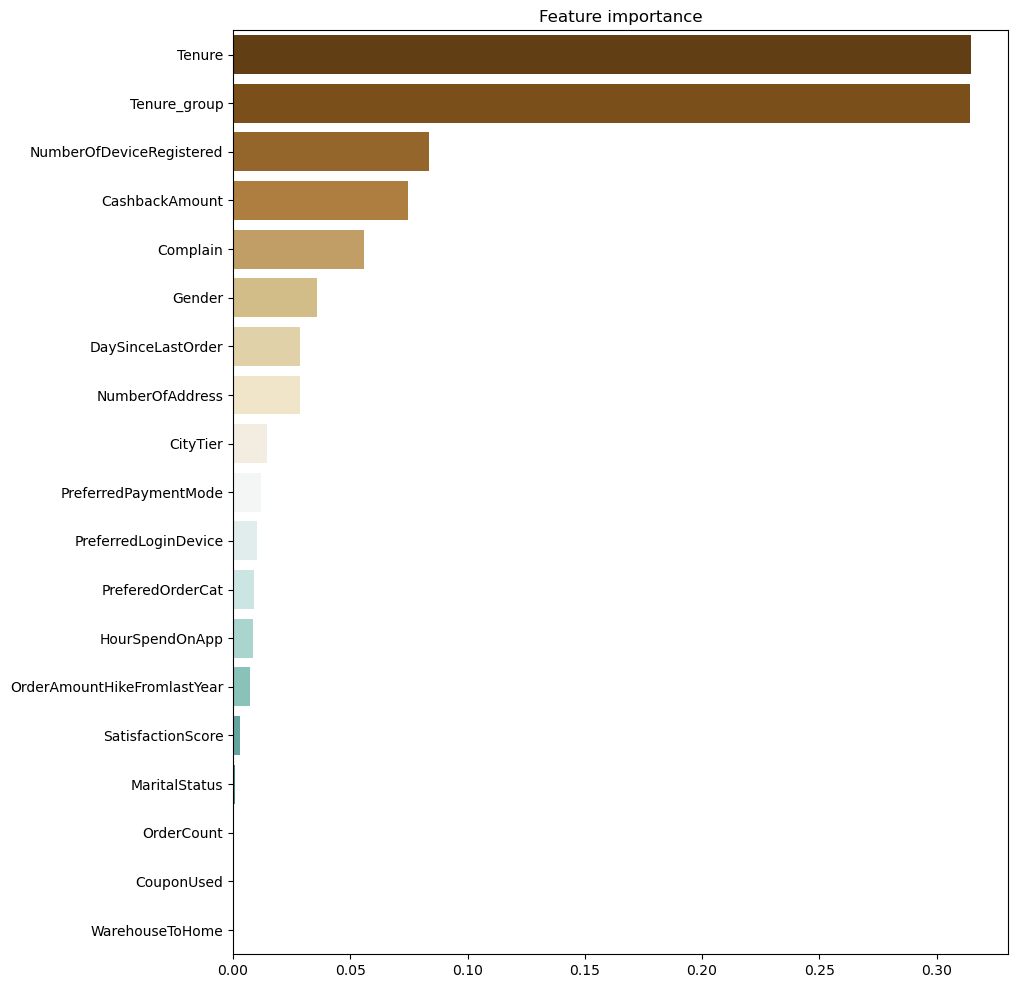

In [ ]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

#### Interpretation:
* Tenure, Tenure_group, NumberOfDeviceRegistered, Complain, Complain are the top 5 important fetaures in our dataset.

## Random Forest Visualization

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

## Step 2: Plotting the Tree

In [ ]:
train_2=pd.concat([y_train,X_train],axis=1)
train_2.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349
1,0,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246
2,0,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246
3,0,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246
4,0,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484


In [ ]:
independent_variable_1 = list(train_2.columns[1:])
independent_variable_1

['Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Tenure_group']

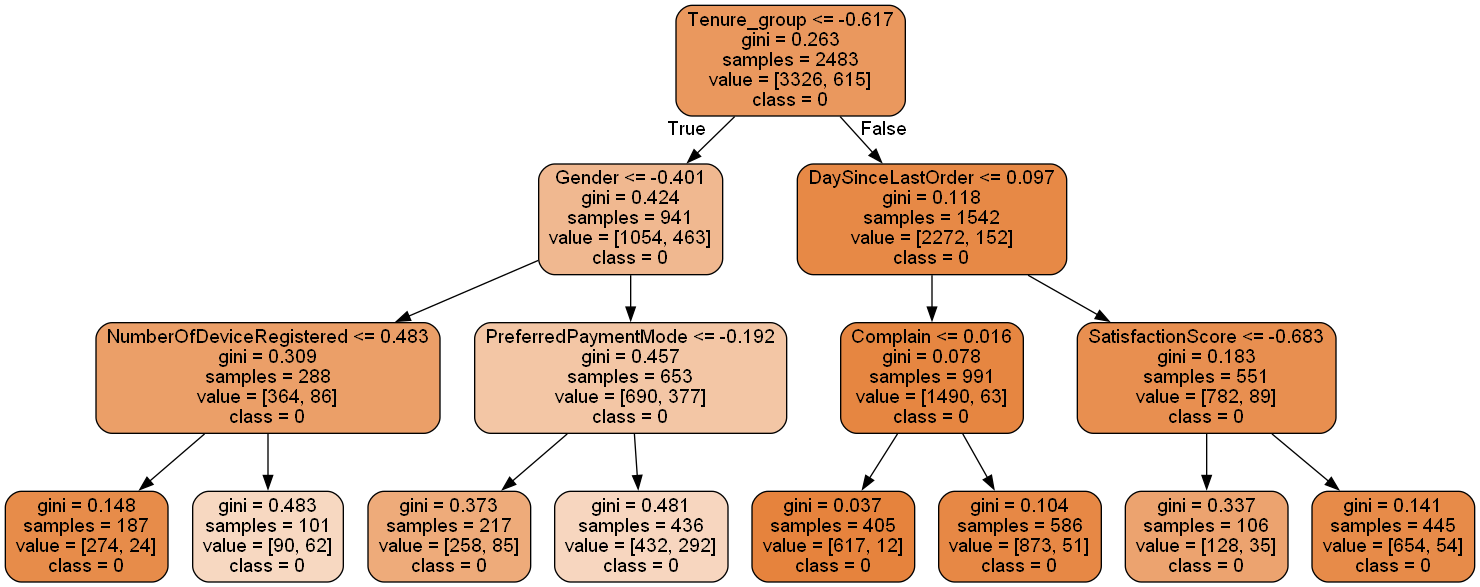

In [ ]:
tree = Model.estimators_[5]  # specify the tree number
Churn=['0','1']
feature_list = independent_variable_1  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot',
                feature_names = feature_list,
                leaves_parallel=True,
                class_names=Churn,
                rounded = True,
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

## Step 3 : Predictions on Train Dataset

In [ ]:
train_2=pd.concat([X_train,y_train],axis=1)
train_2.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0


In [ ]:
train_2['Predicted']=Model.predict(X_train)
train_2.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,...,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,...,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,...,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,...,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0,0


## Step 4 : Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train_2['Churn'], train_2['Predicted'])
print(confusion_matrix)

[[3263   17]
 [ 562   99]]


In [ ]:
Accuracy_Train_2=((3263+ 99)/(3941)*100)
print(Accuracy_Train_2)

85.30829738645014


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_2['Churn'], train_2['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3280
           1       0.85      0.15      0.25       661

    accuracy                           0.85      3941
   macro avg       0.85      0.57      0.59      3941
weighted avg       0.85      0.85      0.81      3941



#### Interpretation:
* Here we get 85% accuracy on train.
* Here we have 15% bad Customer in our dataset which are going to churn.
* Here we have 99% good customer in our dataset which will not churn.
* Model Performance on Train dataset is good fit.

## Step 5 : Predictions on Test Dataset

In [ ]:
test_2=pd.concat([X_test,y_test],axis=1)
test_2.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,-0.362340,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,-0.362340,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,-0.010694,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,-0.711194,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,-0.711194,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0


In [ ]:
test_2['Predicted']=Model.predict(X_test)
test_2.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,...,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0,0


## Step 6 : Model Performance Metrics on Test data

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_2['Predicted'],test_2['Churn'])
print(confusion_matrix)

[[1395  255]
 [   7   32]]


In [ ]:
Accuracy_test_2=((1395+32)/(1689)*100)
Accuracy_test_2

84.48786264061575

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_2['Churn'], test_2['Predicted']))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      1402
           1       0.82      0.11      0.20       287

    accuracy                           0.84      1689
   macro avg       0.83      0.55      0.56      1689
weighted avg       0.84      0.84      0.79      1689



#### Interpretation:
* Here we get 84% accuracy on test.
* Here we have 11% bad Customer in our dataset which are going to churn.
* Here we have 100% good customer in our dataset which will not churn.
* Model Performance on Test dataset is good fit.

## d. KNN

## Fit the model on the training data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(2, 9)}


knn2 = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn2,
                        param_grid, # 2,3,4,5,6,7,8
                        cv=10,
                        verbose=1)
knn_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8])},
             verbose=1)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

#### Interpretation:
* Here we get the best value for the k is 3

## Step 1: Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Step 2 : Predictions on Train Dataset

In [ ]:
train_3=pd.concat([X_train,y_train],axis=1)
train_3.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0


In [ ]:
train_3['Predicted']=model.predict(X_train)
train_3.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,...,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,...,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0,1
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,...,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,...,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0,0


## Step 3 : Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train_3['Churn'],train_3['Predicted'])
print(confusion_matrix)

[[3252   28]
 [  59  602]]


In [ ]:
Accuracy_Train_3=((3252+602)/(3941)*100)
print(Accuracy_Train_3)

97.79243846739406


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_3['Churn'], train_3['Predicted']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3280
           1       0.96      0.91      0.93       661

    accuracy                           0.98      3941
   macro avg       0.97      0.95      0.96      3941
weighted avg       0.98      0.98      0.98      3941



#### Interpretation:
* Here We get 98% of accuracy on train.
* Here we have 91% bad Customer in our dataset which are going to churn.
* Here we have 99% good customer in our dataset which will not churn.
* Model Performance on Train dataset is over fit.

## Step 4 : Predictions on Test Dataset

In [ ]:
test_3=pd.concat([X_test,y_test],axis=1)
test_3.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,-0.362340,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,-0.362340,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,-0.010694,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,-0.711194,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,-0.711194,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0


In [ ]:
test_3['Predicted']=model.predict(X_test)
test_3.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,...,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0,0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_3['Churn'],test_3['Predicted'])
print(confusion_matrix)

[[1335   67]
 [  94  193]]


In [ ]:
Accuracy_test_3=((1335+193)/(1689)*100)
Accuracy_test_3

90.46773238602724

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_3['Churn'], test_3['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1402
           1       0.74      0.67      0.71       287

    accuracy                           0.90      1689
   macro avg       0.84      0.81      0.82      1689
weighted avg       0.90      0.90      0.90      1689



#### Interpretation:
* Here we get 90% accuracy on test.
* Here we have 67% bad Customer in our dataset which are going to churn.
* Here we have 95% good customer in our dataset which will not churn.
* Model Performance on Test dataset is good fit

### Cross Validation Method - Random concept
* To identify the best value of K

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for K in range(25):
    K_value = K+1
    model2 = KNeighborsClassifier(n_neighbors = K_value)
    model2.fit(X_train, y_train)
    y_pred_Train= model2.predict(X_train)
    y_pred_test = model2.predict(X_test)
    print("Train Accuracy is ",
          round(accuracy_score(y_train,y_pred_Train)*100,0), "      ","Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  100.0        Test Accuracy is  96.0 % for K-Value: 1
Train Accuracy is  98.0        Test Accuracy is  92.0 % for K-Value: 2
Train Accuracy is  98.0        Test Accuracy is  90.0 % for K-Value: 3
Train Accuracy is  94.0        Test Accuracy is  91.0 % for K-Value: 4
Train Accuracy is  95.0        Test Accuracy is  91.0 % for K-Value: 5
Train Accuracy is  92.0        Test Accuracy is  89.0 % for K-Value: 6
Train Accuracy is  93.0        Test Accuracy is  89.0 % for K-Value: 7
Train Accuracy is  90.0        Test Accuracy is  89.0 % for K-Value: 8
Train Accuracy is  91.0        Test Accuracy is  89.0 % for K-Value: 9
Train Accuracy is  89.0        Test Accuracy is  88.0 % for K-Value: 10
Train Accuracy is  90.0        Test Accuracy is  89.0 % for K-Value: 11
Train Accuracy is  89.0        Test Accuracy is  88.0 % for K-Value: 12
Train Accuracy is  90.0        Test Accuracy is  88.0 % for K-Value: 13
Train Accuracy is  89.0        Test Accuracy is  88.0 % for K-Value: 14


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(2, 9)}


knn2 = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn2,
                        param_grid, # 2,3,4,5,6,7,8
                        cv=10,
                        verbose=1)
knn_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8])},
             verbose=1)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [ ]:
knn_gscv.best_score_

0.9139786673520529

# e. Naive Bayes

## Step 1 : Model Building

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model= GaussianNB()  # Laplace smoothing (alpha) = 0

#Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB()

## Step 2 : Predictions on Train Dataset

In [ ]:
train_4=pd.concat([X_train,y_train],axis=1)
train_4.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0


In [ ]:
train_4['Probability']=model.predict_proba(X_train)[:,1]
train_4['Predicted']=np.where(train_4['Probability'] >= 0.7,1,0)  #thershold  >0.7
train_4.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Probability,Predicted
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,...,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0,0.431198,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,...,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0,0.009444,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,...,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0,0.284038,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0,0.033198,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0,0.015190,0


## Step 3 : Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train_4['Predicted'],train_4['Churn'])
print(matrix)

[[3107  349]
 [ 173  312]]


In [ ]:
Accuracy_Train_4=((3107+312)/(3941)*100)
print(Accuracy_Train_4)

86.75463080436437


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_4['Churn'], train_4['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3280
           1       0.64      0.47      0.54       661

    accuracy                           0.87      3941
   macro avg       0.77      0.71      0.73      3941
weighted avg       0.86      0.87      0.86      3941



#### Interpretation:
* Here we get 87% accuracy on Train.
* Here we have 47% bad Customer in our dataset which are going to churn.
* Here we have 95% good customer in our dataset which will not churn.
* Model Performance on Tain dataset is good fit.

## Step 4 : Predictions on Test Dataset

In [ ]:
test_4=pd.concat([X_test,y_test],axis=1)
test_4.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,-0.362340,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,-0.362340,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,-0.010694,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,-0.711194,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,-0.711194,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0


In [ ]:
test_4['Probability']=model.predict_proba(X_test)[:,1]
test_4['Predicted']=np.where(test_4['Probability'] >= 0.7,1,0)  #thershold  >0.7
test_4.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Probability,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0,1.436242e-14,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1,6.555291e-03,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0,2.948993e-04,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0,3.660734e-01,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,...,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0,3.093207e-02,0


## Step 5: Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_4['Predicted'],test_4['Churn'])
print(matrix)

[[1329  146]
 [  73  141]]


In [ ]:
Accuracy_Test_4=((1329+141)/(1689)*100)
print(Accuracy_Test_4)

87.03374777975134


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_4['Churn'], test_4['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1402
           1       0.66      0.49      0.56       287

    accuracy                           0.87      1689
   macro avg       0.78      0.72      0.74      1689
weighted avg       0.86      0.87      0.86      1689



* Here we get 87% accuracy on test.
* Here we have 49% bad Customer in our dataset which will not get the loan.
* Here we have 95% good customer in our dataset which will get the loan.
* Model Performance on Test dataset is good fit

## Live Data Perdiction

In [ ]:
Live_data=X_test.iloc[0:4,:]
Live_data

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,-0.362340,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,-0.362340,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,-0.010694,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,-0.711194,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349


In [ ]:
Live_data['Probability']=model.predict_proba(Live_data)[:,1]
Live_data['Predicted']=np.where(Live_data['Probability'] >= 0.7,1,0)  #thershold  >0.7
Live_data.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Probability,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,1.436242e-14,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,6.555291e-03,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,2.948993e-04,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,3.660734e-01,0


## Business Submission

### Train

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_4['Churn'], train_4['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3280
           1       0.64      0.47      0.54       661

    accuracy                           0.87      3941
   macro avg       0.77      0.71      0.73      3941
weighted avg       0.86      0.87      0.86      3941



In [ ]:
import pickle
pickle.dump(model, open('NB_model.pkl','wb'))

# f. XG Boost

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent

In [ ]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0
gscv = GridSearchCV(estimator=model,
                    param_grid=model_parameters,
                    cv=5,
                    verbose=1,
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)  ## Model building

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [ ]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 50, 'reg_lambda': 1}


In [ ]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
final_mod.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.6,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

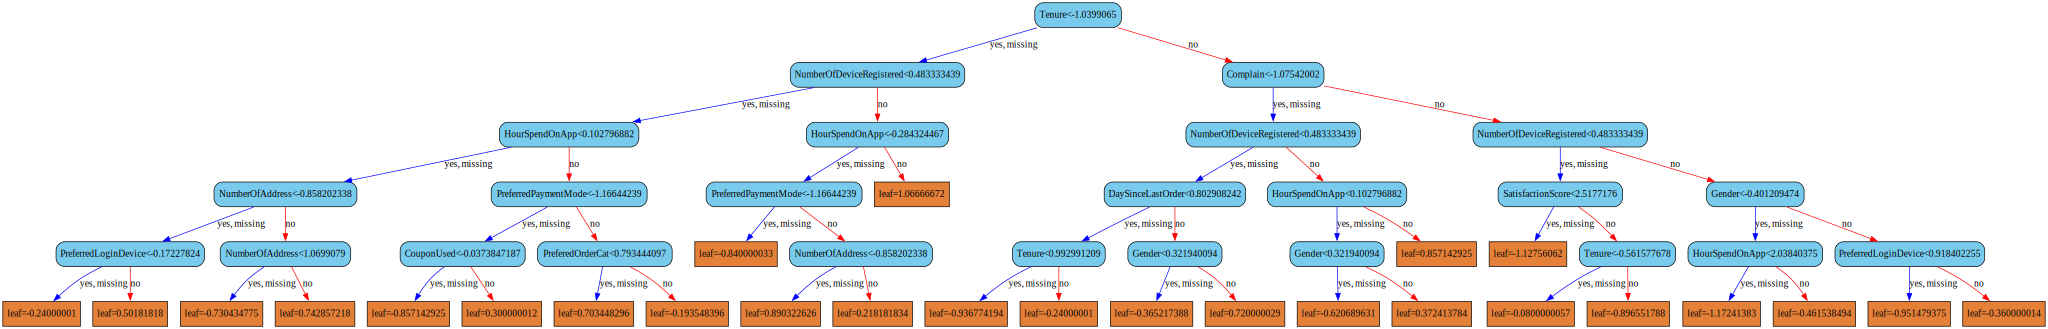

In [ ]:
xgb.to_graphviz(final_mod,num_trees=0,size="5,5",   # Tree = 10
               condition_node_params=parent_node,
               leaf_node_params=child_node)

## Accuracy of Train

In [ ]:
train_5=pd.concat([X_train,y_train],axis=1)
train_5['Predicted']=final_mod.predict(X_train)  # MODEL = Final_mod
train_5.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,...,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,...,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,...,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,...,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0,0


In [ ]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      3280
           1       0.74      0.45      0.56       661

    accuracy                           0.88      3941
   macro avg       0.82      0.71      0.75      3941
weighted avg       0.87      0.88      0.87      3941



#### Interpretation:
* Here we get 88% accuracy on Tain.
* Here we have 45% bad Customer in our dataset which are going to churn.
* Here we have 97% good customer in our dataset which will not churn.
* Model Performance on Train dataset is good fit.

## Accuracy of Test

In [ ]:
test_5=pd.concat([X_test,y_test],axis=1)
test_5['Predicted']=final_mod.predict(X_test)  # MODEL = Final_mod
test_5.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,...,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0,0


In [ ]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1402
           1       0.68      0.45      0.54       287

    accuracy                           0.87      1689
   macro avg       0.79      0.70      0.73      1689
weighted avg       0.86      0.87      0.86      1689



#### Interpretation:
* Here we get 87% accuracy on Test.
* Here we have 45% bad Customer in our dataset which are going to churn.
* Here we have 96% good customer in our dataset which will not churn.
* Model Performance on Test dataset is good fit.

## Importance Feature

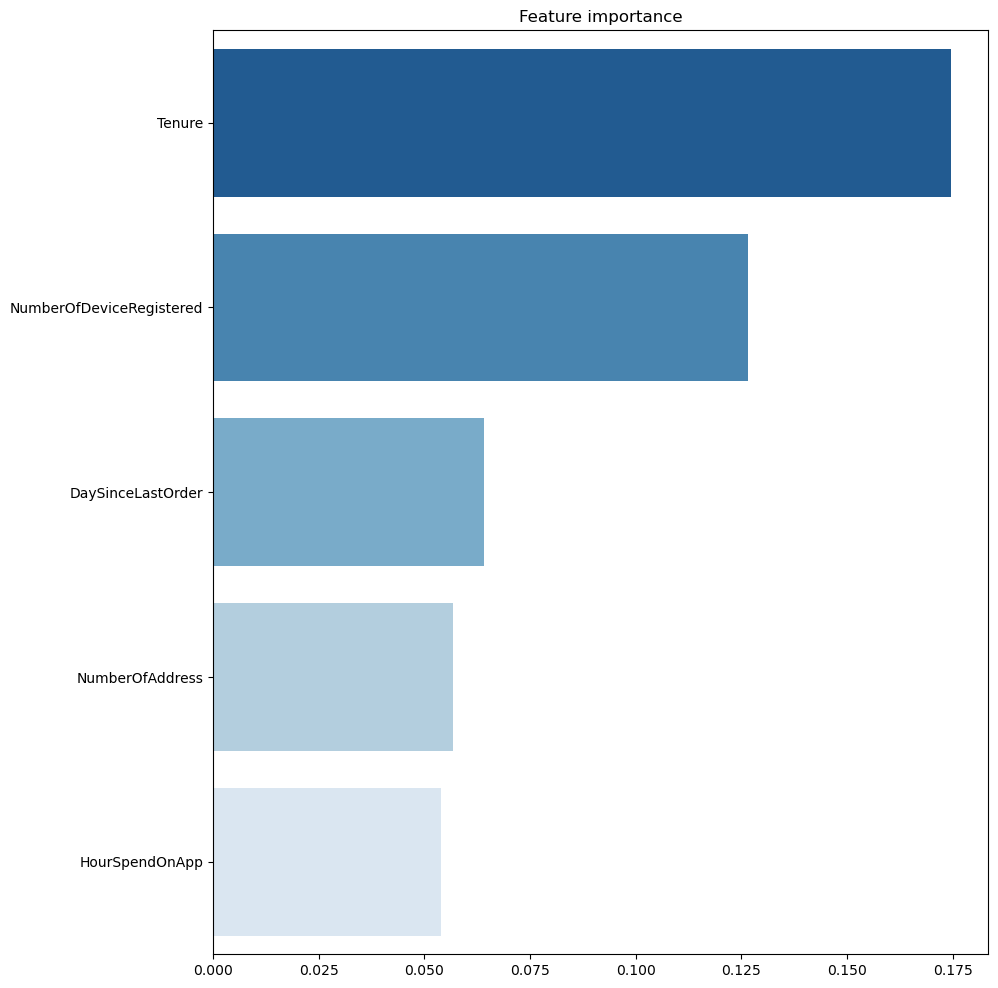

In [ ]:
# Plot features importances
imp = pd.Series(data=final_mod.feature_importances_, index=independent_variable).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

#### Interpretation:
* Here we see that Tenure, NumberOfDeviceRegistered, DaySinceLastOrder, NumberOfAddress,HourSpendOnApp are more important features of our dataset as per this model.

# g. SVM

## Step 1 : Model Building

In [ ]:
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
model = SVC(kernel="linear")  # if we use linear then only we get support_vector
model.fit(X_train, y_train) #Variable = fgood ( defaulter =1 , non-defaulter = 0)

SVC(kernel='linear')

In [ ]:
model.support_vectors_

array([[-0.62136877, -0.71761849, -0.79656279, ...,  1.15594419,
        -0.26331586, -1.02234921],
       [-1.09969764, -0.71761849,  1.65552845, ...,  1.15594419,
        -1.77383665, -1.02234921],
       [-1.09969764,  1.46374246, -0.44626404, ...,  1.15594419,
         1.24720494, -1.02234921],
       ...,
       [-1.21927986, -0.71761849, -1.03009529, ..., -1.6683435 ,
         1.24720494, -1.02234921],
       [-0.74095099,  1.46374246, -0.67979654, ..., -0.25619966,
         1.24720494, -1.02234921],
       [-1.09969764, -0.71761849, -0.67979654, ...,  1.15594419,
        -1.77383665, -1.02234921]])

In [ ]:
np.round(model.intercept_,1)

array([-1.8])

In [ ]:
np.round(model.coef_,1)

array([[-1. ,  0.2,  0.2, -0.1,  0.2,  0.3,  0.3,  0.5, -0. ,  0.1,  0.3,
        -0.3, -0.1, -0.1, -0. ,  0.1,  0.2,  0.3, -0. ]])

## Step 2 : Predictions on Train Dataset

In [ ]:
train_6=pd.concat([X_train,y_train],axis=1)
train_6.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,-0.711194,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,-0.362340,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,-0.711194,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,-0.362340,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0


In [ ]:
train_6['Predicted']=model.predict(X_train)
train_6.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,-1.219280,-0.717618,1.071697,0.094104,-0.679116,-1.485934,-0.090764,-0.627347,-1.300755,-0.949938,...,-0.720480,-0.834735,1.515849,-0.401170,0.821080,1.155944,-0.263316,-1.022349,0,0
1,0.096125,1.463742,-0.679797,0.094104,0.295537,-1.485934,-0.090764,-0.627347,-0.742302,-0.416452,...,-0.169592,0.440292,0.103231,0.326401,0.821080,-1.668344,1.247205,1.407246,0,0
2,-0.262622,-0.717618,0.721398,-1.324097,0.295537,0.683515,-1.252128,1.594014,-1.300755,-0.416452,...,-0.720480,-0.606783,1.515849,1.781543,-1.217909,-0.256200,-0.263316,1.407246,0,0
3,-0.262622,-0.717618,1.188463,1.512304,0.295537,-1.485934,-0.865007,-0.627347,-1.021529,-0.416452,...,-0.445036,-0.530799,0.103231,-0.401170,0.821080,1.155944,-0.263316,1.407246,0,0
4,0.694036,-0.717618,2.239360,0.094104,1.270189,-0.762784,-0.865007,-0.627347,-1.021529,-0.416452,...,0.105853,-0.151489,-1.309387,-1.856312,-1.217909,-0.256200,-1.773837,-0.212484,0,0


## Step 3 : Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train_6['Predicted'],train_6['Churn'])
print(confusion_matrix)

[[3182  374]
 [  98  287]]


In [ ]:
Accuracy_Train=((3182+287)/(3941)*100)
print(Accuracy_Train)

88.02334432885056


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_6['Churn'], train_6['Predicted']))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3280
           1       0.75      0.43      0.55       661

    accuracy                           0.88      3941
   macro avg       0.82      0.70      0.74      3941
weighted avg       0.87      0.88      0.87      3941



#### Interpretation:
* Here we get 88% accuracy on Tain.
* Here we have 43% bad Customer in our dataset which are going to churn.
* Here we have 97% good customer in our dataset which will not churn.
* Model Performance on Train dataset is good fit

## Step 4 : Predictions on Test Dataset

In [ ]:
test_6=pd.concat([X_test,y_test],axis=1)
test_6.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,-0.362340,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,-0.362340,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,-0.010694,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,-0.711194,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,-0.711194,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0


In [ ]:
test_6['Predicted']=model.predict(X_test)
test_6.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_group,Churn,Predicted
0,4.759831,-0.717618,-1.146862,0.094104,-2.628421,-0.039635,-1.252128,-0.627347,2.329190,-0.416452,...,0.932186,-0.583967,1.515849,0.326401,0.82108,-0.256200,-1.773837,2.217111,0,0
1,1.172364,-0.717618,1.772295,1.512304,0.295537,-1.485934,-0.477885,-0.627347,0.374604,-0.416452,...,-0.995925,-0.545873,0.103231,0.326401,0.82108,1.155944,1.247205,-0.212484,1,0
2,1.531111,-0.717618,1.655528,0.094104,-0.679116,-0.039635,-0.090764,1.594014,0.653831,-0.949938,...,0.105853,1.264303,0.103231,0.326401,0.82108,-0.962272,-1.773837,-0.212484,0,0
3,-1.219280,1.463742,-0.212732,-1.324097,-0.679116,-1.485934,-1.252128,-0.627347,0.933057,-0.416452,...,-0.995925,-0.697638,-1.309387,1.053972,0.82108,-0.256200,-0.263316,-1.022349,0,0
4,-0.382204,0.373062,0.137567,-1.324097,0.295537,0.683515,0.296358,-0.627347,-1.300755,-0.949938,...,0.932186,-0.667489,-1.309387,0.326401,0.82108,-0.256200,-1.773837,1.407246,0,0


## Step 5 : Model Performance Metrics on Test data

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix( test_6['Predicted'],test_6['Churn'])
print(confusion_matrix)

[[1352  160]
 [  50  127]]


In [ ]:
Accuracy_test_6=((1352+127)/(1689)*100)
Accuracy_test_6

87.56660746003553

In [ ]:
print(classification_report(test_6['Churn'], test_6['Predicted']))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1402
           1       0.72      0.44      0.55       287

    accuracy                           0.88      1689
   macro avg       0.81      0.70      0.74      1689
weighted avg       0.86      0.88      0.86      1689



#### Interpretation:
* Here we get 88% accuracy on Test.
* Here we have 44% bad Customer in our dataset which are going to churn.
* Here we have 96% good customer in our dataset which will not churn.
* Model Performance on Test dataset is good fit.

# Accuracy of the Models


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
accuracy = pd.read_excel (r"C:\Users\LENOVO\Desktop\ML\ML project\Accuracy of Model.xlsx")
accuracy

,Algorithm,Train,Test,Sensitivity,Specificity
0,Logistic Regression,88,87,0.45,0.96
1,Decision Tree,87,88,0.53,0.96
2,Random Forest,85,84,0.11,1.00
3,KNN,97,90,0.67,0.95
4,Naive Bayes,86,87,0.49,0.95
5,Xg Boost,88,87,0.45,0.96
6,SVM,88,88,0.44,0.96


# Interpretation:
* On this e-com churn preiction data i have build models on Logistic Regression, Decision Tree, Random Forest, Knn, Navie Bayes, Xg Boost and SVM Algorithm.
* Here we see all the accuracy of the models.
* On Logistic Regression the accuracy on train = 88 and test = 87 which is good fit, and the differnces is also less between train and test accuracy.
* On Decision Tree before purnning the accuracy on train = 100 but after applying purnning method, got 87 accuracy on train and 88 on test.
* On Random Forest accuracy on train = 85 and test = 84 which is less than Decision Tree but still it is in good fit.
* On KNN i get accuracy on train = 97 and test = 90 which is overfit so model is fail on this algorithm.
* On Navie Bayes accuracy on train = 86 and test = 87 which is good fit.
* On Xg boost accuracy on train = 88 and test = 87 which is also good fit.
* On SVM accuracy on train and test are 88 which has no difference between on train and test as compare to other model is good fit and best.


# But:

* Here we see except Knn all models are good fit.
* But the Sensitivity & Specificity of the random forest is 11% and 100%.
* Which indicates 11% bad customers, and 100% good custmores in our data.
* So out off all the models Random Forest is the best and goodfit on this data.